In [1]:
#pip install scikit-learn
#pip install seaborn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_set = pd.read_csv('training_set.csv')
training_set['HomeResult'] = training_set['HomeResult'].map({'Won': 1, 'Lost': 0})
result = training_set["HomeResult"]
data = training_set.iloc[:, 7:]
#data.head()
info = training_set.iloc[:, :7]
info.head()


,Game,Date,AwayTeam,AwayScore,HomeTeam,HomeScore,HomeResult
0,"2021-02-02 - MIN 1, COL 2",2021-02-02,MIN,1,COL,2,1
1,"2021-02-04 - OTT 3, MTL 2",2021-02-04,OTT,3,MTL,2,0
2,"2021-02-04 - VAN 3, TOR 7",2021-02-04,VAN,3,TOR,7,1
3,"2021-02-05 - BOS 2, PHI 1",2021-02-05,BOS,2,PHI,1,0
4,"2021-02-06 - MTL 2, OTT 1",2021-02-06,MTL,2,OTT,1,0


In [3]:
# Load dataset
training_set = pd.read_csv('training_set.csv')
X = data
y = result

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predict labels and probabilities
predicted_labels = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)

# Create DataFrame
results_df = pd.DataFrame(probabilities, columns=[f'Prob_{label}' for label in svm_model.classes_])
results_df['Predicted Label'] = predicted_labels

# Display results
print(results_df.head())

     Prob_0    Prob_1  Predicted Label
0  0.471785  0.528215                1
1  0.370947  0.629053                1
2  0.570334  0.429666                0
3  0.661864  0.338136                0
4  0.500000  0.500000                0


In [9]:
import joblib

# Assuming svm_model is your trained model and scaler is your StandardScaler instance
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [16]:
svm_model = joblib.load('svm_model.joblib')
scaler = joblib.load('scaler.joblib')
df5 = pd.read_csv('today_games.csv')
games = df5['Game']
features= df5.drop(columns=['Game'], inplace=True)
features.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [23]:
# Load the saved SVM model and scaler
svm_model = joblib.load('svm_model.joblib')
scaler = joblib.load('scaler.joblib')
df5 = pd.read_csv('today_games.csv')

game_ids = df5['Game']

# Step 2: Prepare and Scale the Features
# Drop the 'Game' column to prepare the features
features = df5.drop(columns=['Game'])

# Assuming df_combined_corrected is your dataframe
# Drop columns that are not features of the model


# Scale the features using the loaded scaler
scaled_features = scaler.transform(features)

# Predict probabilities
probabilities = svm_model.predict_proba(scaled_features)
predicted_labels = svm_model.predict(scaled_features)
# Create a DataFrame for probabilities
prob_df = pd.DataFrame(probabilities, columns=[f'Prob_{label}' for label in svm_model.classes_])
prob_df['Predicted Label'] = predicted_labels
prob_df['Game ID'] = game_ids

# Step 5: Export to CSV
prob_df.to_csv('predicted_probabilities_and_labels.csv', index=False)

In [6]:
# Calculate Log Loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.666293793312864


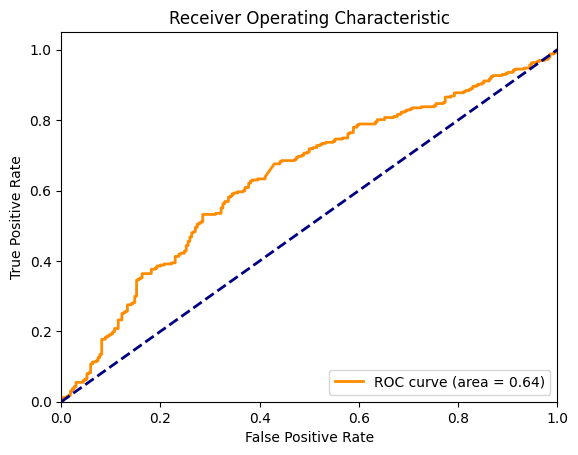

In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class
y_probs = probabilities[:, 1]  # assuming it's a binary classification (0 or 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

[[159 111]
 [120 207]]


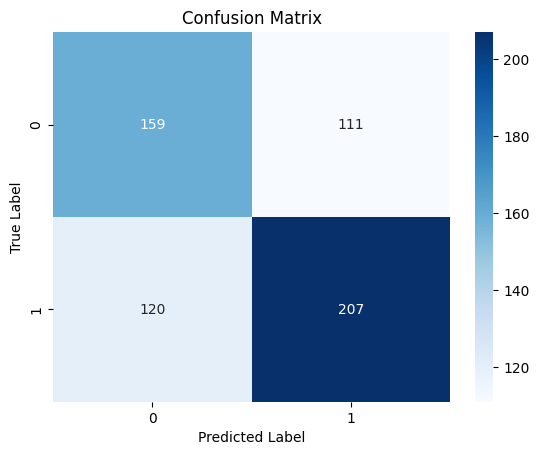

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels
#predicted_labels = svm_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print(cm)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Log Loss: 0.666293793312864


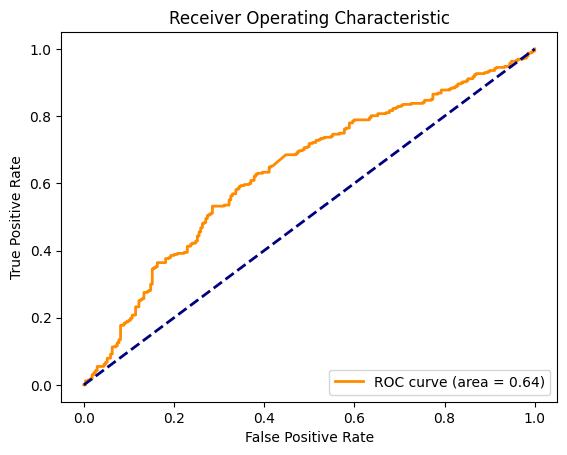

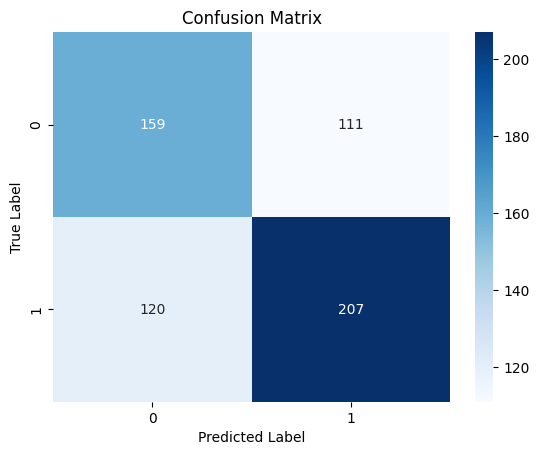

In [8]:
# Metrics
# Log Loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

# ROC Curve and AUC
y_probs = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()